# Extracción de Caracteristicas

Usaremos el dataset generado anteriormente el cual fue rellanado con los promedios 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
#https://www.kaggle.com/zhangjuefei/birds-bones-and-living-habits
# Los esqueletos de este conjunto de datos son colecciones del Museo de Historia Natural del Condado de Los Ángeles.
#Pertenecen a 21 órdenes, 153 géneros, 245 especies.
file = "birds_avarage.csv"
df=pd.read_csv(file)
# Cargamos el conjunto de datos en un dataframe
all_variables = df.columns.values.tolist()
features = all_variables[0:-1]
target = ['target']
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [3]:
#Estandarizamos las caracteristicas (media=0, varianza=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0.172937,0.331737,0.141992,0.352727,0.284873,0.258637,0.000000,0.311024,0.184955,0.236783
1,0.192759,0.328743,0.162879,0.417273,0.334569,0.314659,0.318635,0.358268,0.201698,0.249442
2,0.170962,0.313174,0.135250,0.389091,0.296845,0.277311,0.297868,0.312008,0.182623,0.199553
3,0.165305,0.273054,0.126670,0.342727,0.268054,0.241830,0.271514,0.249016,0.167494,0.204765
4,0.129099,0.221557,0.093158,0.248182,0.210186,0.167134,0.216503,0.205709,0.144173,0.183917


In [4]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)
df_pca.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,-9.599629,-42.924329,-17.779577,0.482913,39.129973,4.093338,0.578549,-1.463542,-0.057422,0.898487
1,30.357961,4.407320,4.757146,-10.329553,3.333914,0.489817,0.846206,-0.286508,0.090316,0.153409
2,14.423491,5.173633,6.463685,-10.325878,3.368584,0.440681,1.214072,-0.354396,-0.091765,0.134991
3,7.317171,0.944281,7.187409,-9.670818,5.059164,0.292573,0.821173,0.140599,-0.072127,-0.098742
4,-17.307399,-2.332592,5.879870,-6.844050,6.317790,0.537951,0.320547,0.220100,-0.277894,0.186704


In [5]:
explained_variance = pca.explained_variance_ratio_
explained_variance
for i in explained_variance:
    print(i*100)

89.69750363800156
7.952095385650789
1.2160098611623233
0.7324601592738467
0.3728772967788784
0.015968686881549052
0.005766184211183807
0.004133020875512265
0.002449317246178584
0.0007364499181779916


In [6]:
df_pca['target'] = df['type']
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-9.599629,-42.924329,-17.779577,0.482913,39.129973,4.093338,0.578549,-1.463542,-0.057422,0.898487,3
1,30.357961,4.407320,4.757146,-10.329553,3.333914,0.489817,0.846206,-0.286508,0.090316,0.153409,3
2,14.423491,5.173633,6.463685,-10.325878,3.368584,0.440681,1.214072,-0.354396,-0.091765,0.134991,3
3,7.317171,0.944281,7.187409,-9.670818,5.059164,0.292573,0.821173,0.140599,-0.072127,-0.098742,3
4,-17.307399,-2.332592,5.879870,-6.844050,6.317790,0.537951,0.320547,0.220100,-0.277894,0.186704,3


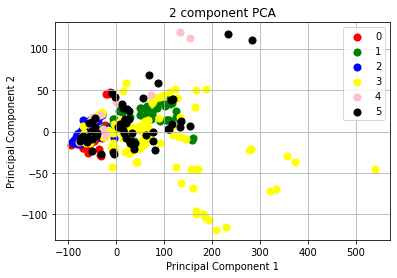

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0,1,2,3,4,5]
colors = ['r', 'g', 'b','yellow','pink','black']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()